Importing Libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
#Importing Dataset
df = pd.read_csv('/content/TSLA.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
#Getting Shape and information of the data
df.shape


(2416, 7)

In [4]:
#Describing Dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Exploratory Data Analysis

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.

While performing the EDA of the Tesla Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

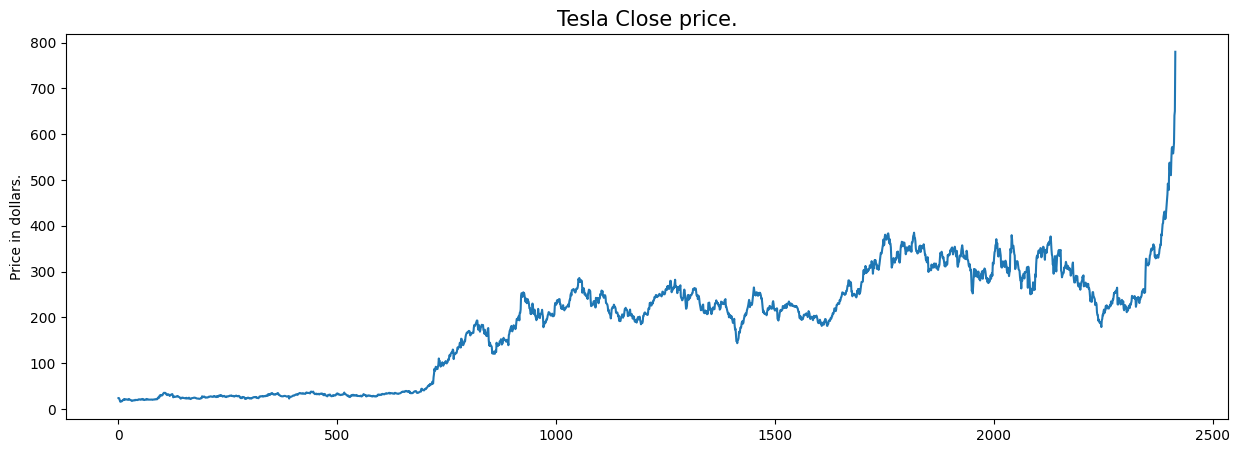

In [8]:
#Exploratory Data Analysis
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [9]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [10]:
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [11]:
#Dropping Columns
df = df.drop(['Adj Close'], axis=1)


In [12]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

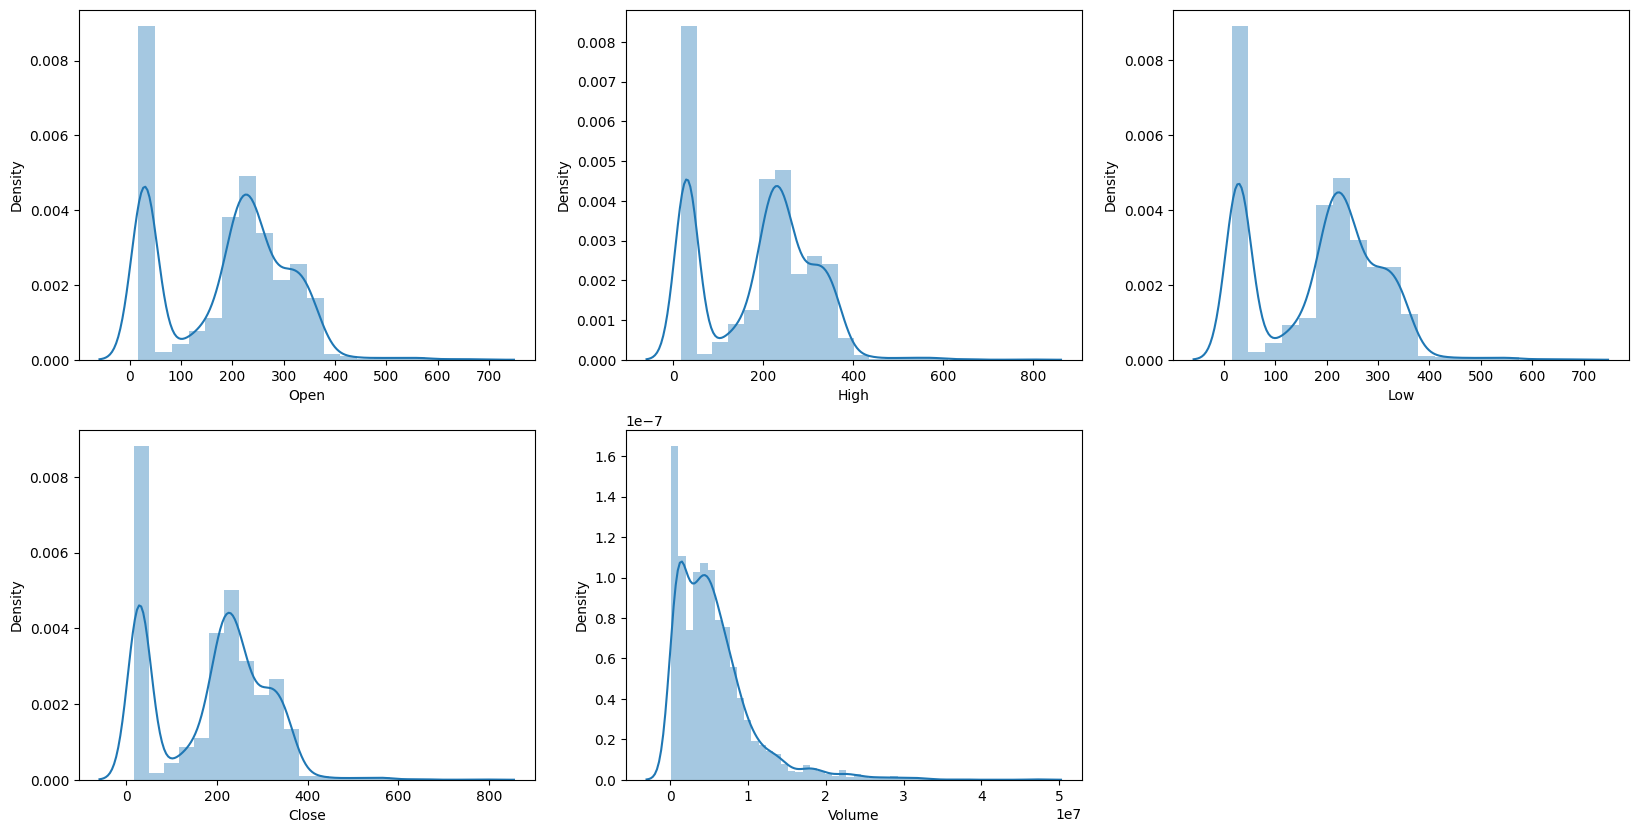

In [13]:
#Plotting Dataset Entries
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


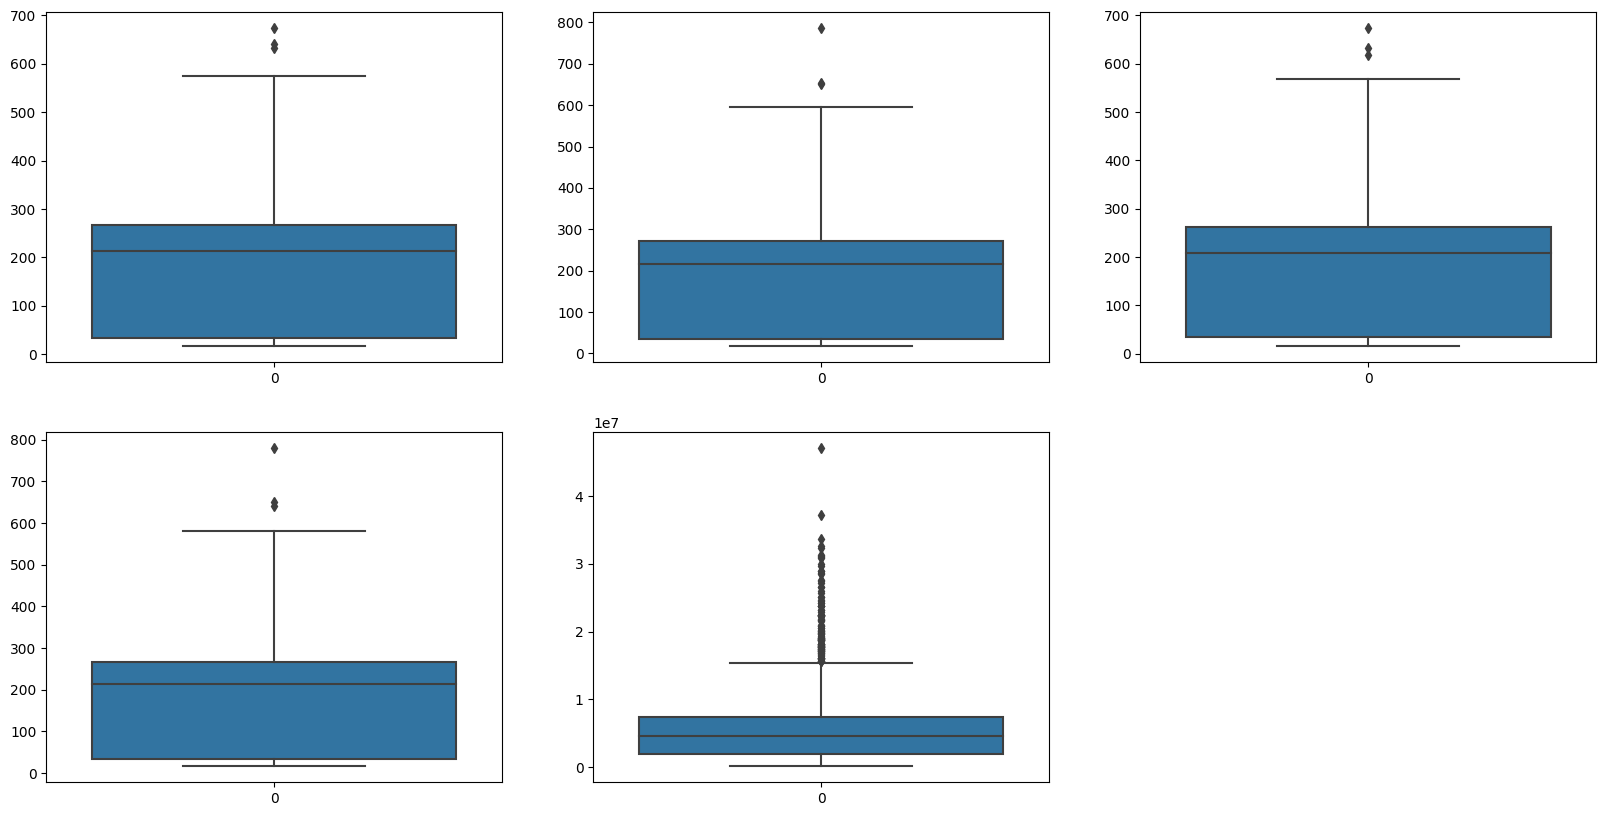

In [14]:
#Boxplot to identify outliers
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


<Axes: xlabel='Date', ylabel='High'>

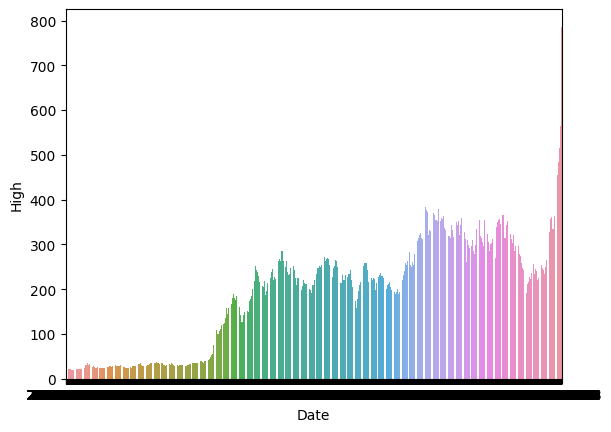

In [19]:
import seaborn as sns
sns.barplot(x='Date',y='High',data = df)

Feature Engineering

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [21]:
#Feature Engineering
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6


In [22]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,6,2010,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,6,2010,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,7,2010,1,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,7,2010,2,1
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,7,2010,6,1


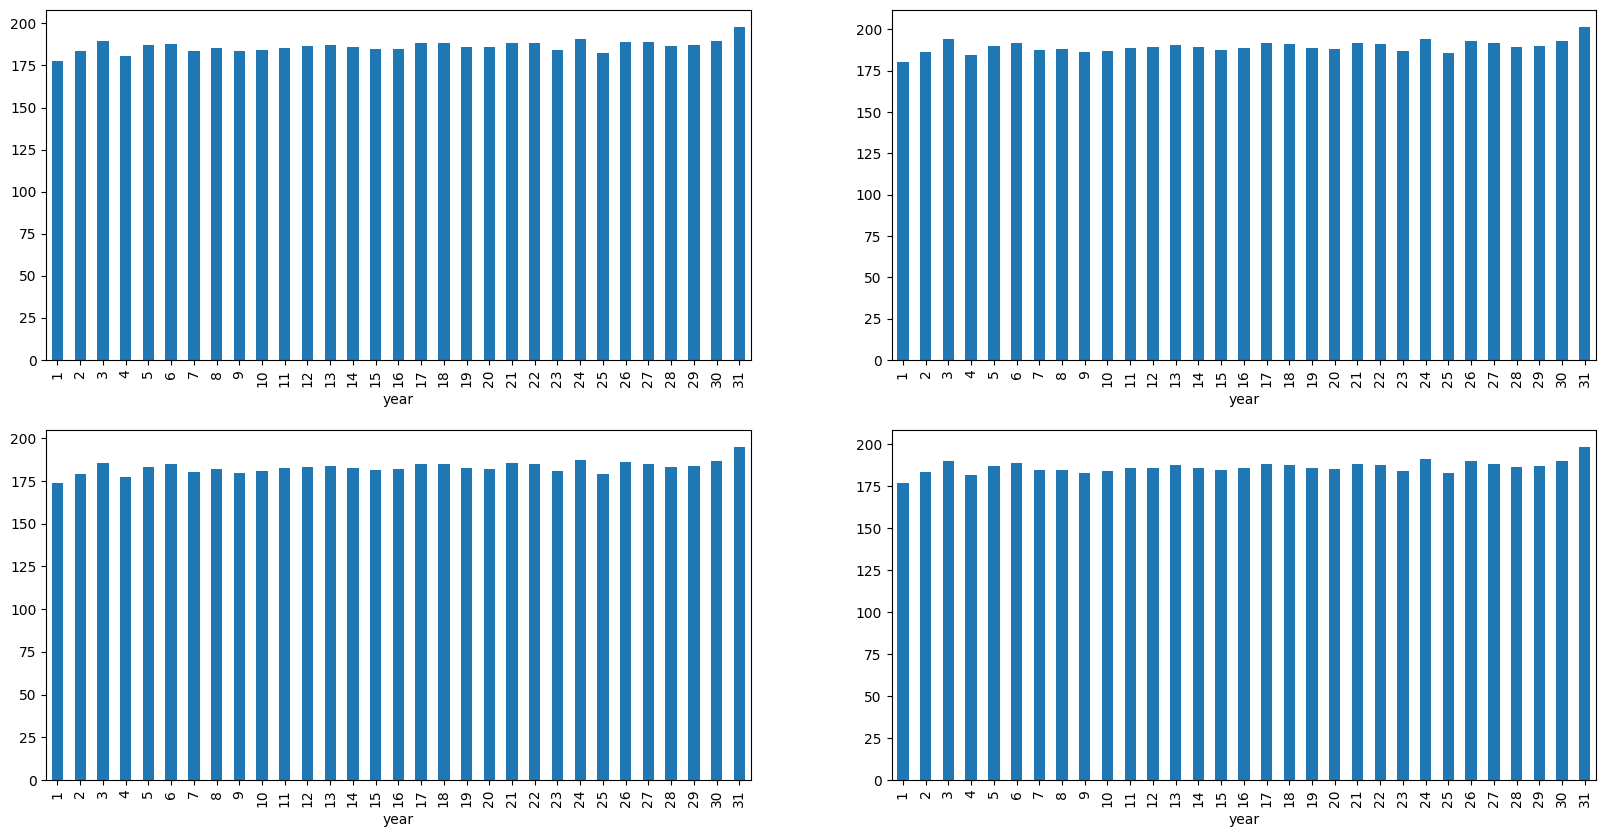

In [23]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [24]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,195.383850,198.830719,191.934386,195.566477,5.012534e+06,6.455556,2014.578431,15.760784
1,170.534763,173.600440,167.344233,170.580711,6.540089e+06,6.972912,2015.119639,15.726862


In [25]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


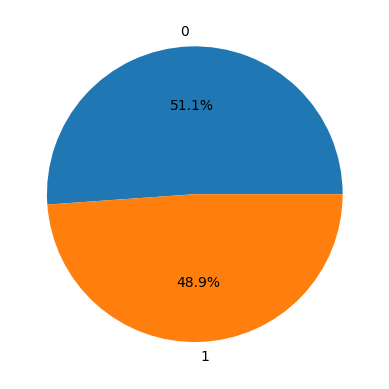

In [26]:
#Correlation
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [27]:
df.corr()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
Open,1.000000,0.999425,0.999575,0.998886,0.501762,-0.006787,0.886733,0.014911,-0.100871,-0.046754,-0.693267,-0.008049
High,0.999425,1.000000,0.999389,0.999640,0.512944,-0.008677,0.886367,0.013758,-0.100596,-0.074850,-0.709016,-0.009339
Low,0.999575,0.999389,1.000000,0.999447,0.493496,-0.006523,0.886549,0.015756,-0.101428,-0.067596,-0.683937,-0.008762
Close,0.998886,0.999640,0.999447,1.000000,0.505169,-0.008383,0.886089,0.014510,-0.101089,-0.093839,-0.700342,-0.009542
Volume,0.501762,0.512944,0.493496,0.505169,1.000000,-0.045784,0.479585,-0.049489,0.147619,-0.107403,-0.749775,0.000355
day,-0.006787,-0.008677,-0.006523,-0.008383,-0.045784,1.000000,-0.105584,-0.000215,0.072377,0.034259,0.049509,-0.009116
month,0.886733,0.886367,0.886549,0.886089,0.479585,-0.105584,1.000000,0.000023,0.093575,-0.048720,-0.613854,0.003720
year,0.014911,0.013758,0.015756,0.014510,-0.049489,-0.000215,0.000023,1.000000,-0.001867,0.007430,0.030739,0.003952
is_quarter_end,-0.100871,-0.100596,-0.101428,-0.101089,0.147619,0.072377,0.093575,-0.001867,1.000000,0.011706,0.053278,0.027661
open-close,-0.046754,-0.074850,-0.067596,-0.093839,-0.107403,0.034259,-0.048720,0.007430,0.011706,1.000000,0.198525,0.032180


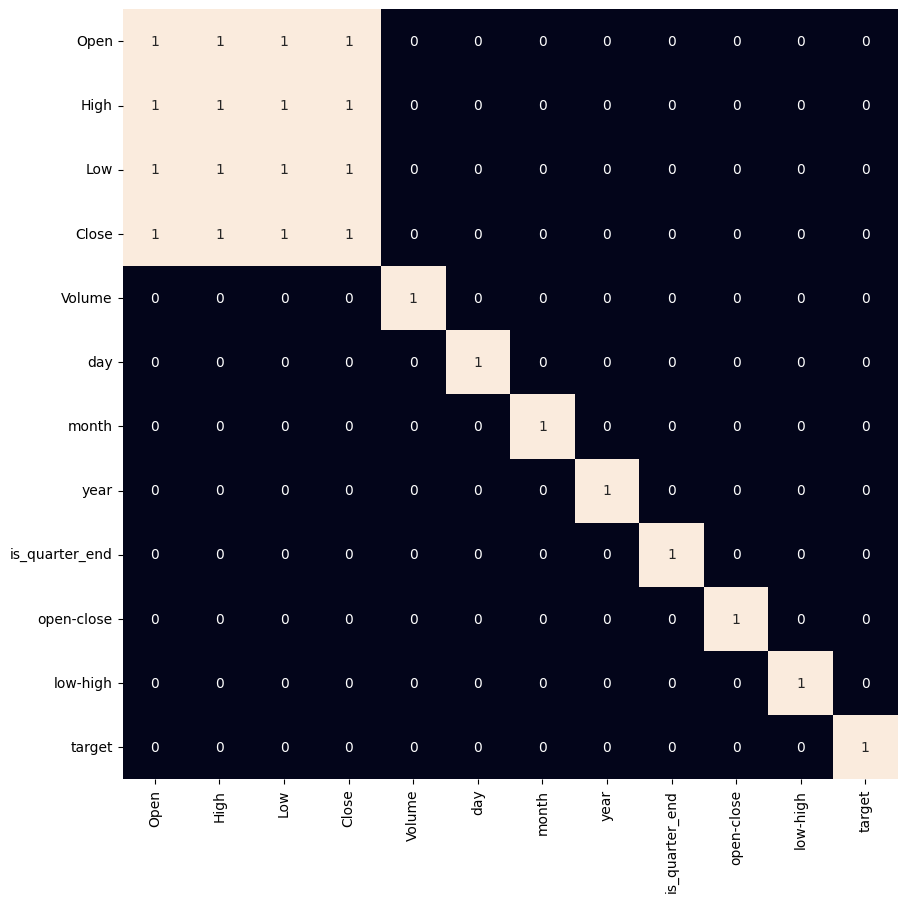

In [28]:
plt.figure(figsize=(10, 10))
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

Data Splitting and Normalization

TEST SIZE 0.2

In [29]:
#Data Splitting and Normalization
#TEST SIZE 0.2
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
	features, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_test.shape)


(1932, 3) (484, 3)


In [ ]:
'''features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.3, random_state=2022)
print(X_train.shape, X_valid.shape)'''

"features = df[['open-close', 'low-high', 'is_quarter_end']]\ntarget = df['target']\n\nscaler = StandardScaler()\nfeatures = scaler.fit_transform(features)\n\nX_train, X_valid, Y_train, Y_valid = train_test_split(\n\tfeatures, target, test_size=0.3, random_state=2022)\nprint(X_train.shape, X_valid.shape)"

In [ ]:
'''features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
	features, target, test_size=0.4, random_state=2022)
print(X_train.shape, X_test.shape)'''

"features = df[['open-close', 'low-high', 'is_quarter_end']]\ntarget = df['target']\n\nscaler = StandardScaler()\nfeatures = scaler.fit_transform(features)\n\nX_train, X_test, Y_train, Y_test = train_test_split(\n\tfeatures, target, test_size=0.4, random_state=2022)\nprint(X_train.shape, X_test.shape)"

Model Development and Evaluation

In [30]:
#Model Development and Evaluation
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5214984160189992
Validation Accuracy :  0.48286170815937324

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.48056568912818887
Validation Accuracy :  0.48520694809545895

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Traini

In [36]:
#Logistic Regression
model_lg = LogisticRegression(random_state=2022)
model_lg.fit(X_train, Y_train)
X_train_prediction_lg = model_lg.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.5289855072463768
precision on training data: 0.523598820058997
recall on training data: 0.728952772073922
f1 on training data: 0.6094420600858369

Accuracy on test data: 0.4896694214876033
precision on test data: 0.5198863636363636
recall on test data: 0.7011494252873564
f1 on test data: 0.5970636215334422
Training score : 0.5289855072463768
Predictions are : [1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 

In [37]:
#SVC
model_lg = SVC(random_state=2022)
model_lg.fit(X_train, Y_train)
X_train_prediction_lg = model_lg.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.5331262939958592
precision on training data: 0.5235602094240838
recall on training data: 0.8213552361396304
f1 on training data: 0.6394884092725819

Accuracy on test data: 0.5206611570247934
precision on test data: 0.5363408521303258
recall on test data: 0.8199233716475096
f1 on test data: 0.6484848484848486
Training score : 0.5331262939958592
Predictions are : [1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 

In [38]:
#XGBC
model_lg = XGBClassifier(random_state=2022)
model_lg.fit(X_train, Y_train)
X_train_prediction_lg = model_lg.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)

X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)

print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.8540372670807453
precision on training data: 0.856701030927835
recall on training data: 0.8531827515400411
f1 on training data: 0.8549382716049383

Accuracy on test data: 0.5020661157024794
precision on test data: 0.540650406504065
recall on test data: 0.5095785440613027
f1 on test data: 0.52465483234714
Training score : 0.8540372670807453
Predictions are : [1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1
 0 1 0 1 1 

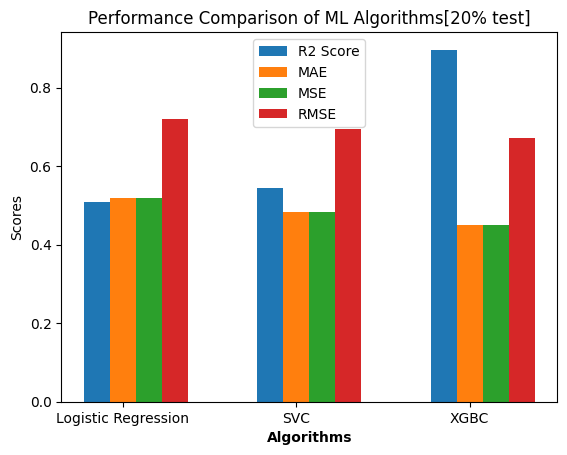

In [34]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have performance metrics for each algorithm[40%test]
r2_scores = [ 0.508, 0.544, 0.897] # Replace with your R2 scores
mae_scores = [0.520,0.483,0.450] # Replace with your MAE scores
mse_scores = [0.520,0.483 ,0.450] # Replace with your MSE scores
rmse_scores = [0.721 ,0.695,0.671] # Replace with your RMSE scores
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, r2_scores, width=bar_width, label='R2 Score')
plt.bar(r3, mae_scores, width=bar_width, label='MAE')
plt.bar(r4, mse_scores, width=bar_width, label='MSE')
plt.bar(r5, rmse_scores, width=bar_width, label='RMSE')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
29
plt.title('Performance Comparison of ML Algorithms[20% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

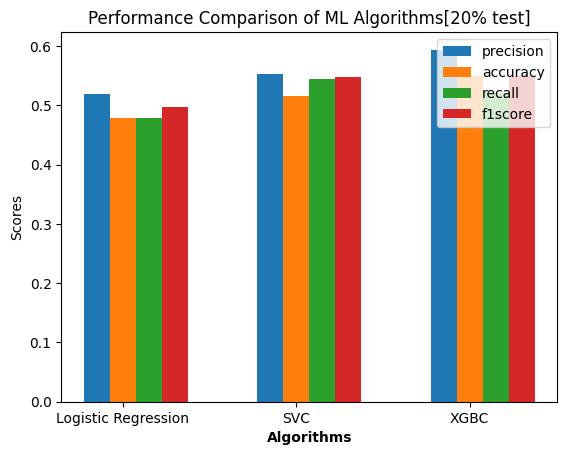

In [35]:
import matplotlib.pyplot as plt
import numpy as np
precision = [0.518672, 0.552529,0.593886]
accuracy = [0.479338, 0.516528,0.549586]
training_score = [0.508626, 0.544513, 0.897860]
f1_score = [0.498007,  0.548262,0.549586]
recall = [ 0.47892,0.544061,0.521072]
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, precision, width=bar_width, label='precision')
plt.bar(r3, accuracy, width=bar_width, label='accuracy')
plt.bar(r4, recall, width=bar_width, label='recall')
plt.bar(r5, f1_score, width=bar_width, label='f1score')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[20% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

TEST SIZE 0.3

In [39]:
#TEST SIZE 0.3
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.3, random_state=2022)
print(X_train.shape, X_valid.shape)

(1691, 3) (725, 3)


In [40]:
#Model Development and Evaluation
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5234210187625555
Validation Accuracy :  0.49138360565606587

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5
Validation Accuracy :  0.4977578475336323

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.

In [41]:
model_lg = LogisticRegression(random_state=2022)
model_lg.fit(X_train, Y_train)
X_train_prediction_lg = model_lg.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.5150798344175045
precision on training data: 0.5160965794768612
recall on training data: 0.602112676056338
f1 on training data: 0.5557963163596965

Accuracy on test data: 0.47520661157024796
precision on test data: 0.5121951219512195
recall on test data: 0.5632183908045977
f1 on test data: 0.5364963503649636
Training score : 0.5150798344175045
Predictions are : [1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 0 1 

In [ ]:
model_lg = SVC(random_state=2022)
model_lg.fit(X_train, Y_train)
X_train_prediction_lg = model_lg.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)
print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.5445134575569358
precision on training data: 0.541343669250646
recall on training data: 0.5787292817679558
f1 on training data: 0.5594125500667556

Accuracy on test data: 0.5165289256198347
precision on test data: 0.5525291828793775
recall on test data: 0.5440613026819924
f1 on test data: 0.5482625482625484
Training score : 0.5445134575569358
Predictions are : [1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 1

In [ ]:
model_lg = XGBClassifier(random_state=2022)
model_lg.fit(X_train, Y_train)
X_train_prediction_lg = model_lg.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.8978605935127675
precision on training data: 0.9079320113314447
recall on training data: 0.8853591160220995
f1 on training data: 0.8965034965034965

Accuracy on test data: 0.5495867768595041
precision on test data: 0.5938864628820961
recall on test data: 0.5210727969348659
f1 on test data: 0.5551020408163265
Training score : 0.8978605935127675
Predictions are : [1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 

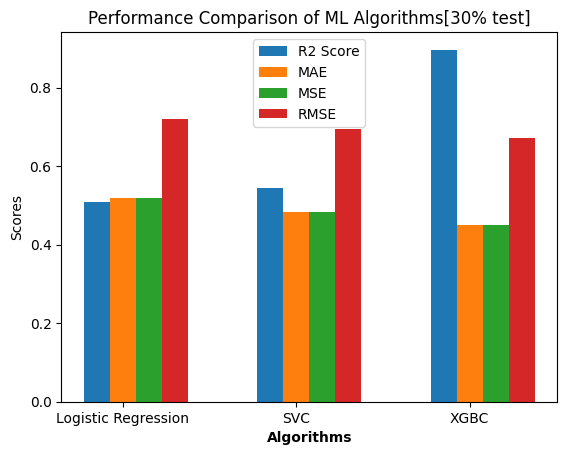

In [54]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have performance metrics for each algorithm[40%test]
r2_scores = [ 0.508, 0.544, 0.897] # Replace with your R2 scores
mae_scores = [0.520,0.483,0.450] # Replace with your MAE scores
mse_scores = [0.520,0.483 ,0.450] # Replace with your MSE scores
rmse_scores = [0.721 ,0.695,0.671] # Replace with your RMSE scores
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, r2_scores, width=bar_width, label='R2 Score')
plt.bar(r3, mae_scores, width=bar_width, label='MAE')
plt.bar(r4, mse_scores, width=bar_width, label='MSE')
plt.bar(r5, rmse_scores, width=bar_width, label='RMSE')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
29
plt.title('Performance Comparison of ML Algorithms[30% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

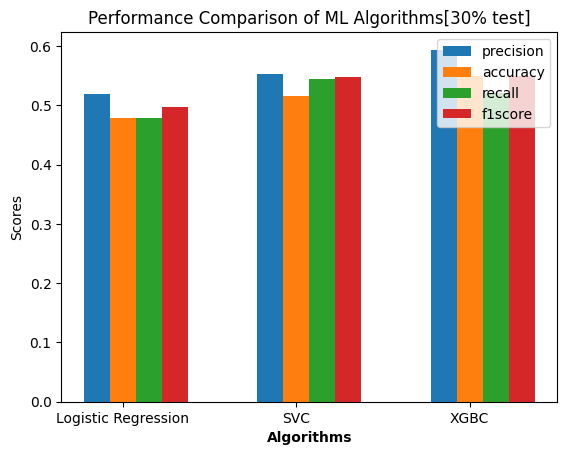

In [53]:
import matplotlib.pyplot as plt
import numpy as np
precision = [0.518672, 0.552529,0.593886]
accuracy = [0.479338, 0.516528,0.549586]
training_score = [0.508626, 0.544513, 0.897860]
f1_score = [0.498007,  0.548262,0.549586]
recall = [ 0.47892,0.544061,0.521072]
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, precision, width=bar_width, label='precision')
plt.bar(r3, accuracy, width=bar_width, label='accuracy')
plt.bar(r4, recall, width=bar_width, label='recall')
plt.bar(r5, f1_score, width=bar_width, label='f1score')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[30% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()

TEST SIZE 0.4

In [42]:
#TEST SIZE 0.4
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.4, random_state=2022)
print(X_train.shape, X_valid.shape)

(1449, 3) (967, 3)


In [43]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_test, models[i].predict_proba(X_test)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5256563154886645
Validation Accuracy :  0.4907478995928045

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.47807582396646986
Validation Accuracy :  0.48334278301805744

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Trainin

In [44]:
model_lg1 = LogisticRegression(random_state=2022)
model_lg1.fit(X_train, Y_train)
X_train_prediction_lg = model_lg1.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg1.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.5086266390614217
precision on training data: 0.5087463556851312
recall on training data: 0.48204419889502764
f1 on training data: 0.49503546099290785

Accuracy on test data: 0.47520661157024796
precision on test data: 0.5121951219512195
recall on test data: 0.5632183908045977
f1 on test data: 0.5364963503649636
Training score : 0.515527950310559
Predictions are : [1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0
 1 1 

In [45]:
model_lg2 = SVC(random_state=2022)
model_lg2.fit(X_train, Y_train)
X_train_prediction_lg = model_lg2.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)
print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg2.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.5445134575569358
precision on training data: 0.541343669250646
recall on training data: 0.5787292817679558
f1 on training data: 0.5594125500667556

Accuracy on test data: 0.47520661157024796
precision on test data: 0.5121951219512195
recall on test data: 0.5632183908045977
f1 on test data: 0.5364963503649636
Training score : 0.515527950310559
Predictions are : [1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 1

In [46]:
model_lg3 = XGBClassifier(random_state=2022)
model_lg3.fit(X_train, Y_train)
X_train_prediction_lg = model_lg3.predict(X_train)
training_data_accuracy_lg  = metrics.accuracy_score(Y_train,X_train_prediction_lg)
training_data_precision_lg = metrics.precision_score(Y_train,X_train_prediction_lg)
training_data_recall_lg = metrics.recall_score(Y_train,X_train_prediction_lg)
training_data_f1_lg = metrics.f1_score(Y_train,X_train_prediction_lg)
print("Accuracy on training data:", training_data_accuracy_lg)
print("precision on training data:", training_data_precision_lg)
print("recall on training data:", training_data_recall_lg)
print("f1 on training data:", training_data_f1_lg)
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(Y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(Y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(Y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(Y_test,X_test_prediction_lg)
print("\nAccuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

print('Training score : {}'.format(model_lg.score(X_train, Y_train)))
y_pred = model_lg.predict(X_test)
print('Predictions are : {}'.format(y_pred))
print('\n')
r2_score = model_lg3.score(X_train, Y_train)
print('r2 score is : {}'.format(r2_score))
print('MAE :', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE :', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Accuracy on training data: 0.8978605935127675
precision on training data: 0.9079320113314447
recall on training data: 0.8853591160220995
f1 on training data: 0.8965034965034965

Accuracy on test data: 0.47520661157024796
precision on test data: 0.5121951219512195
recall on test data: 0.5632183908045977
f1 on test data: 0.5364963503649636
Training score : 0.515527950310559
Predictions are : [1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 0 1 

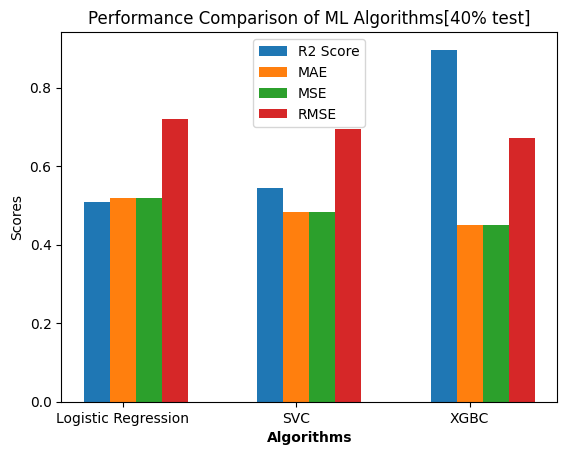

In [51]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming you have performance metrics for each algorithm[40%test]
r2_scores = [ 0.508, 0.544, 0.897] # Replace with your R2 scores
mae_scores = [0.520,0.483,0.450] # Replace with your MAE scores
mse_scores = [0.520,0.483 ,0.450] # Replace with your MSE scores
rmse_scores = [0.721 ,0.695,0.671] # Replace with your RMSE scores
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, r2_scores, width=bar_width, label='R2 Score')
plt.bar(r3, mae_scores, width=bar_width, label='MAE')
plt.bar(r4, mse_scores, width=bar_width, label='MSE')
plt.bar(r5, rmse_scores, width=bar_width, label='RMSE')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
29
plt.title('Performance Comparison of ML Algorithms[40% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()


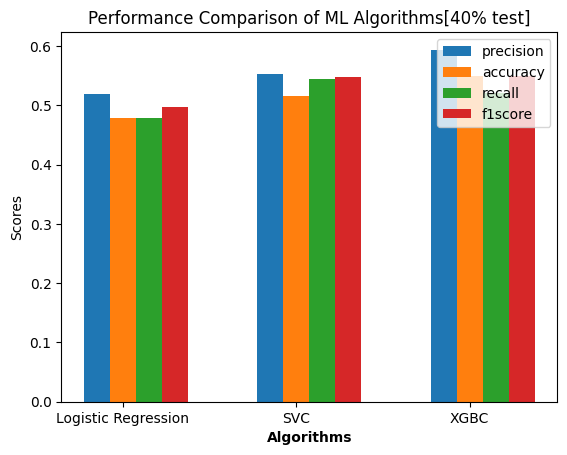

In [52]:
import matplotlib.pyplot as plt
import numpy as np
precision = [0.518672, 0.552529,0.593886]
accuracy = [0.479338, 0.516528,0.549586]
training_score = [0.508626, 0.544513, 0.897860]
f1_score = [0.498007,  0.548262,0.549586]
recall = [ 0.47892,0.544061,0.521072]
# List of algorithms
algorithms = ['Logistic Regression', 'SVC', 'XGBC']
# Set the width of the bars
bar_width = 0.15
# Set the position of each bar on X-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
# Create bar plot
plt.bar(r2, precision, width=bar_width, label='precision')
plt.bar(r3, accuracy, width=bar_width, label='accuracy')
plt.bar(r4, recall, width=bar_width, label='recall')
plt.bar(r5, f1_score, width=bar_width, label='f1score')
# Add labels to the chart
plt.xlabel('Algorithms', fontweight='bold')
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms)
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[40% test]')
# Show legend
plt.legend()
# Show the plot
plt.show()